https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True
import mplcursors

import numpy as np

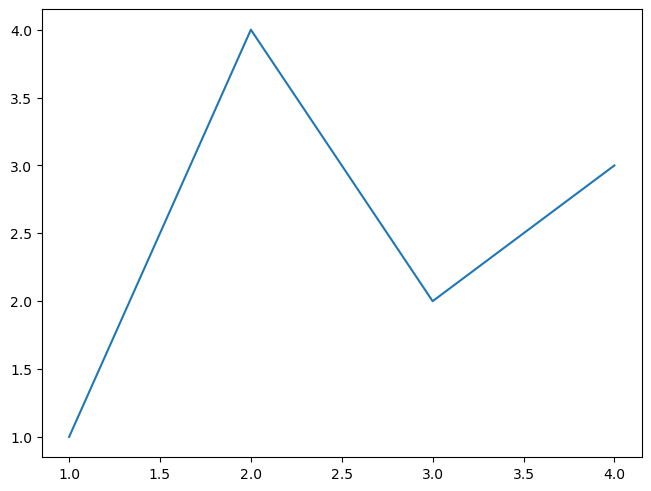

In [2]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

<Figure size 640x480 with 0 Axes>

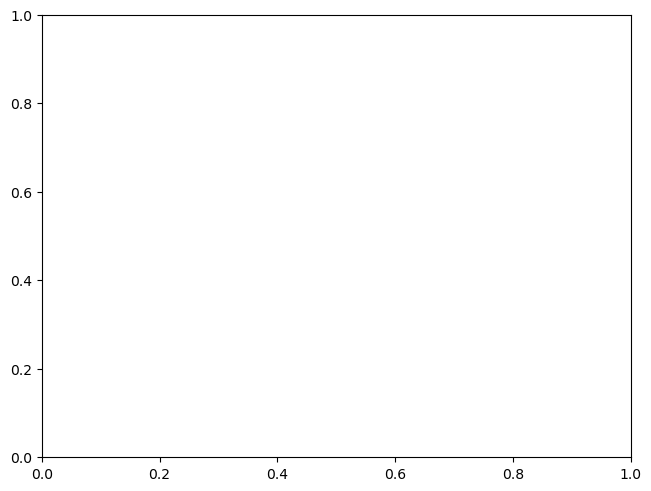

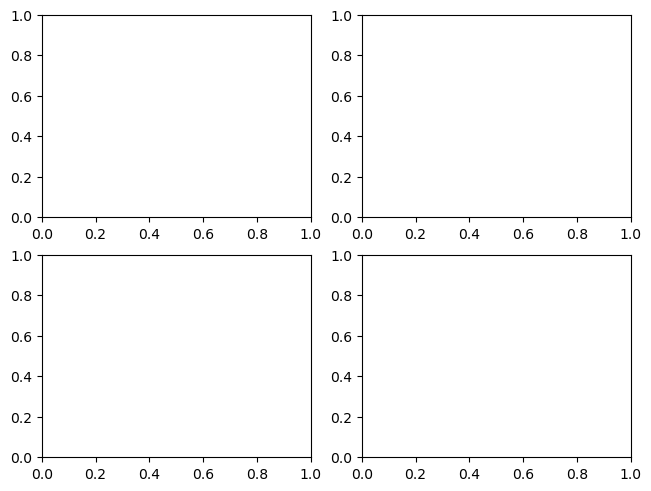

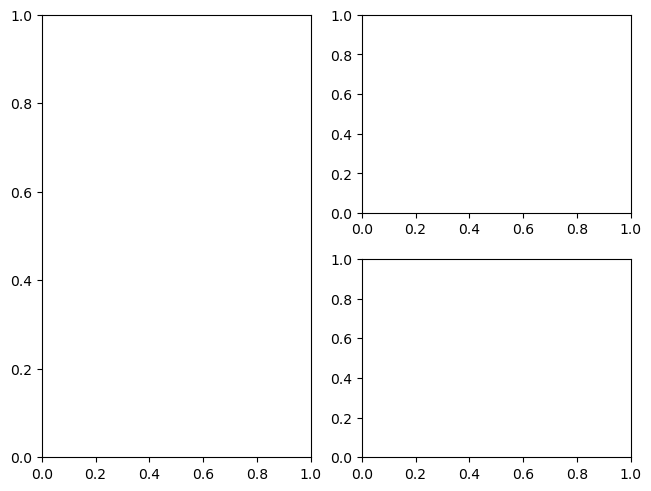

In [3]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([["left", "right-top"], ["left", "right_bottom"]])


In [4]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

In [5]:
b

matrix([[1, 2],
        [3, 4]])

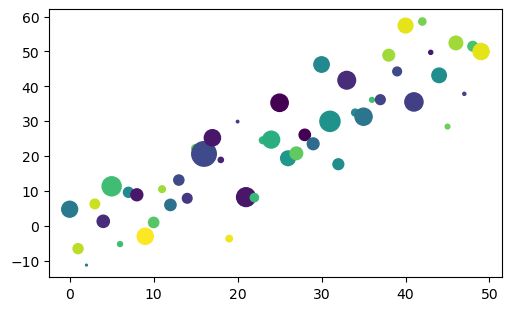

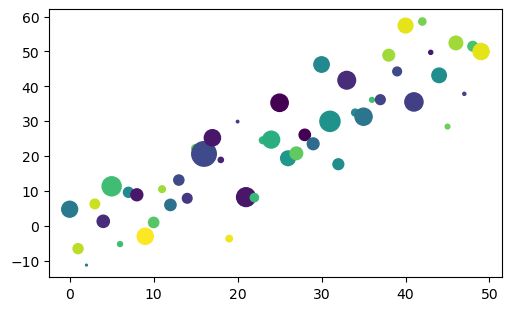

In [6]:
np.random.seed(19680801)  # seed the random number generator.
data = {"a": np.arange(50), "c": np.random.randint(0, 50, 50), "d": np.random.randn(50)}
data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"]) * 100

fig, ax = plt.subplots(figsize=(5, 3), layout="constrained")
ax.scatter("a", "b", c="c", s="d", data=data)
ax_setxlabel = "entry a"
ax_setylabel = "entr b"
fig


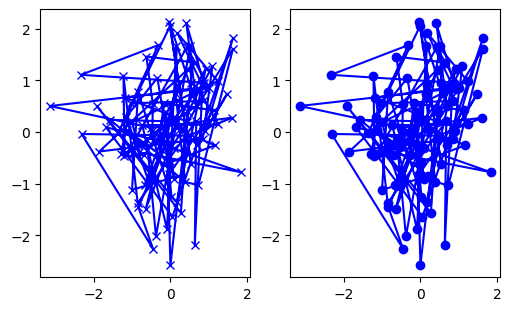

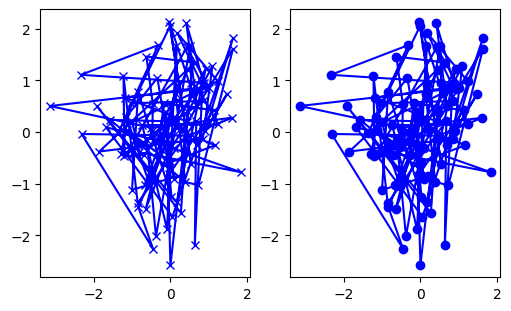

In [7]:
def my_plotter(ax, data1, data2, param_dict, colour):
    out = ax.plot(data1, data2, c=colour, **param_dict)
    return out


data1, data2, data3, data4 = np.random.randn(4, 100)
fig, axs = plt.subplots(1, 2, figsize=(5, 3))
my_plotter(axs[0], data1, data2, {"marker": "x"}, "b")
my_plotter(axs[1], data1, data2, {"marker": "o"}, "b")
fig


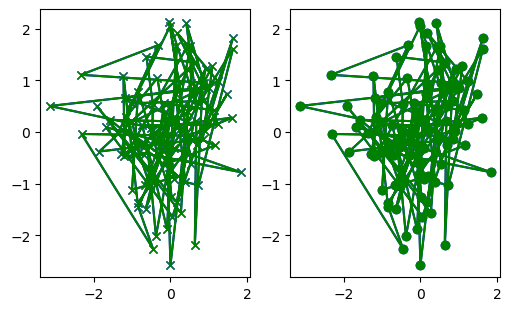

In [8]:
for axis, marker in zip(axs, ["x", "o"]):
    my_plotter(axis, data1, data2, {"marker": marker}, colour="g")

fig


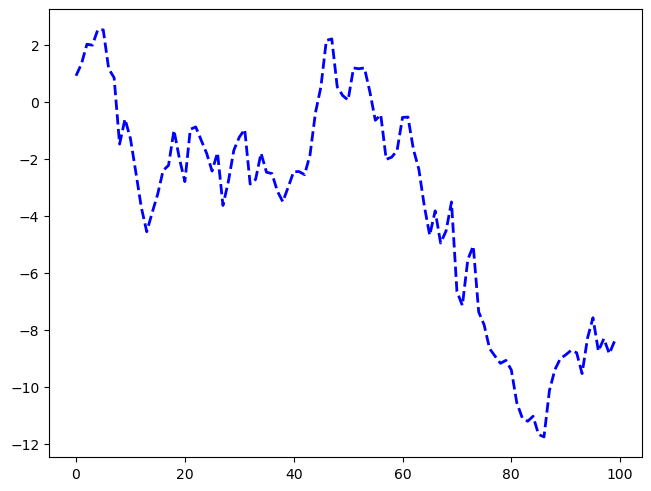

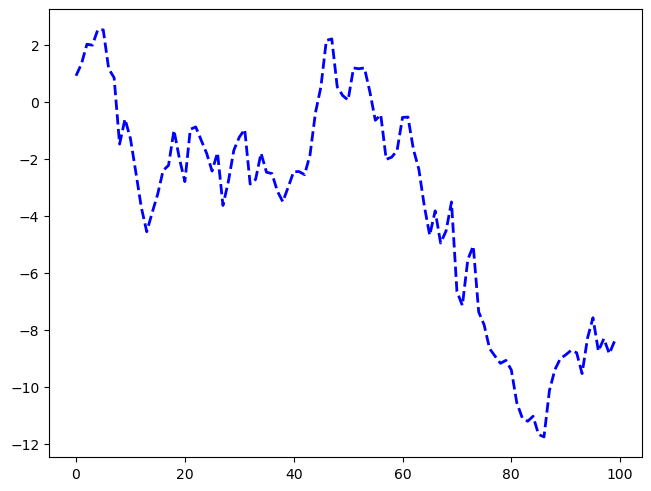

In [9]:
fig, ax = plt.subplots()
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color="blue", linewidth=2, linestyle="--")
fig


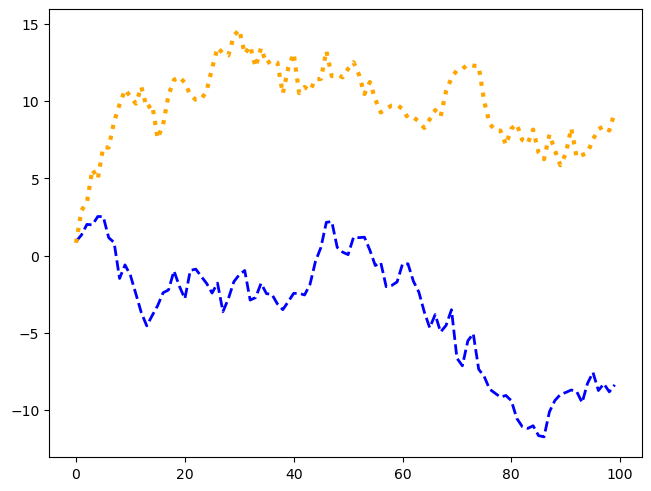

In [10]:
(l,) = ax.plot(x, np.cumsum(data2), color="orange", linewidth=3)
l.set_linestyle(":")
fig


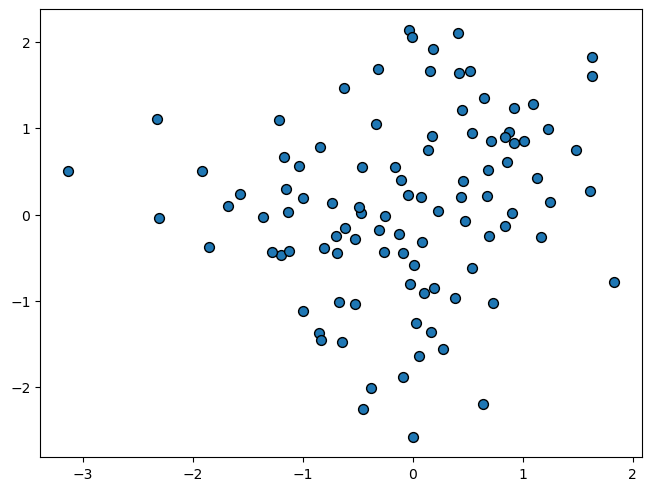

In [11]:
fig, ax = plt.subplots()
ax.scatter(data1, data2, s=50, facecolor="C0", edgecolor="k")


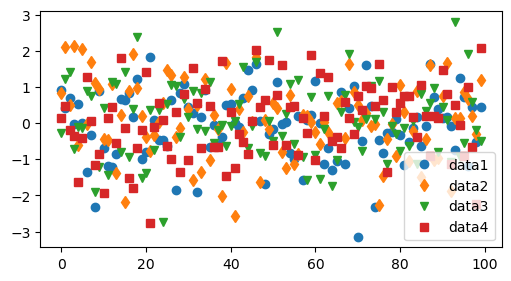

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, "o", label="data1")
ax.plot(data2, "d", label="data2")
ax.plot(data3, "v", label="data3")
ax.plot(data4, "s", label="data4")
ax.legend()


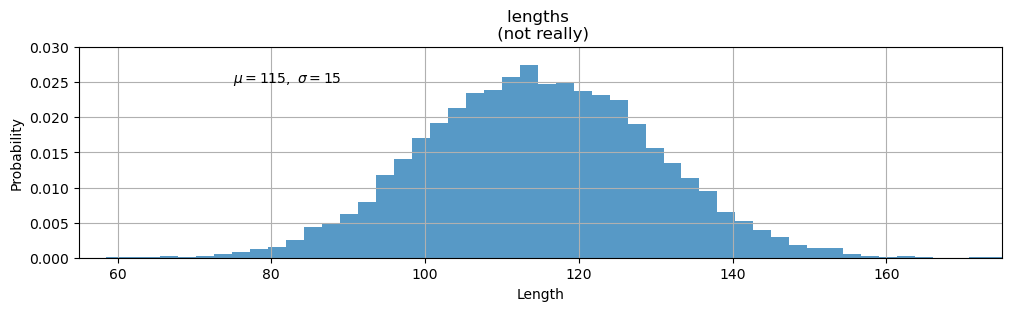

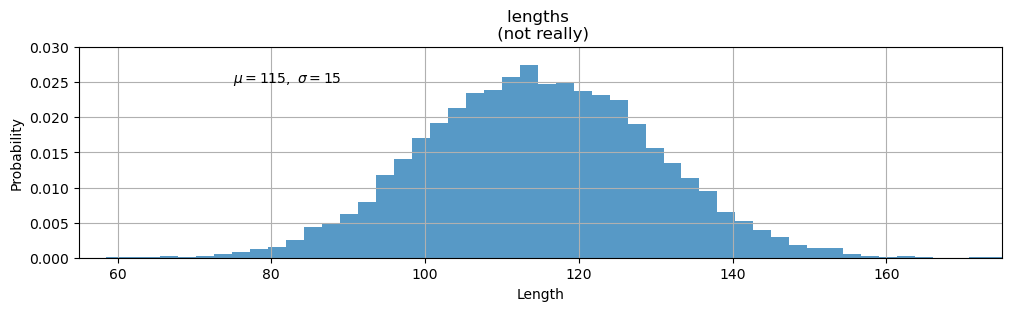

In [13]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(layout="constrained", figsize=(10, 3))
n, bins, pathes = ax.hist(x, 50, density=True, facecolor="C0", alpha=0.75)

ax.set_xlabel("Length")
ax.set_ylabel("Probability")
ax.set_title("lengths \n (not really)")
ax.text(75, 0.025, r"$\mu=115,\ \sigma=15$")
ax.axis([55, 175, 0, 0.03])
ax.grid(True)
fig


(-2.0, 2.0)

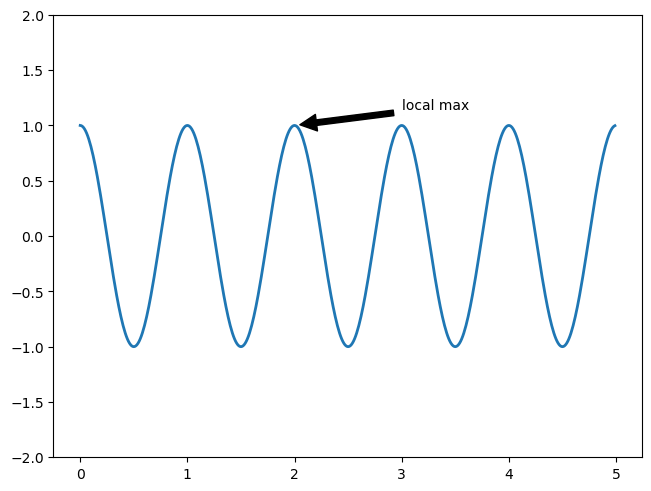

In [14]:
fig, ax = plt.subplots()
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
(l,) = ax.plot(t, s, lw=2)

ax.annotate(
    "local max",
    xy=(2, 1),
    xytext=(3, 1.15),
    arrowprops=dict(facecolor="black", shrink=0.05),
)

ax.set_ylim(-2, 2)

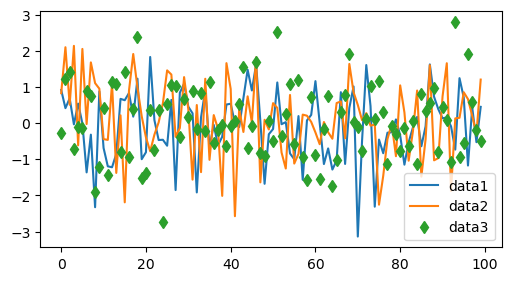

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label="data1")
ax.plot(np.arange(len(data2)), data2, label="data2")
ax.plot(np.arange(len(data3)), data3, "d", label="data3")
ax.legend()

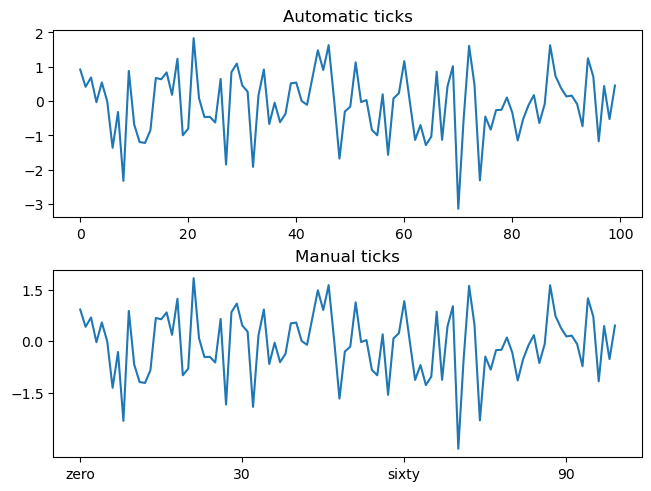

In [16]:
xdata = np.arange(len(data1))
fig, axs = plt.subplots(2, 1, layout="constrained")
axs[0].plot(xdata, data1)
axs[0].set_title("Automatic ticks")

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ["zero", "30", "sixty", "90"])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title("Manual ticks")

mplcursors.cursor()
fig.canvas.draw()

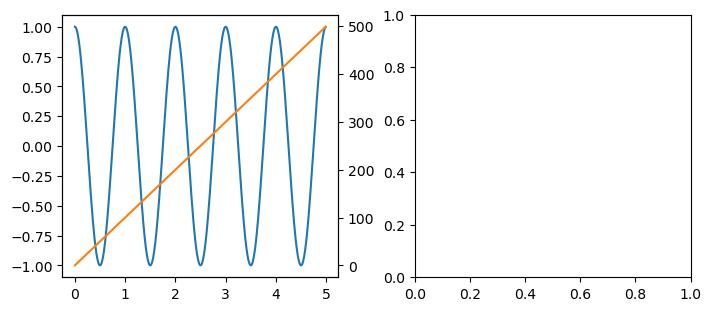

In [17]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 3), layout="constrained")
(l1,) = ax1.plot(t, s)
ax2 = ax1.twinx()
(l2,) = ax2.plot(t, range(len(t)), "C1")

Text(0.5, 1.0, 'scatter()')

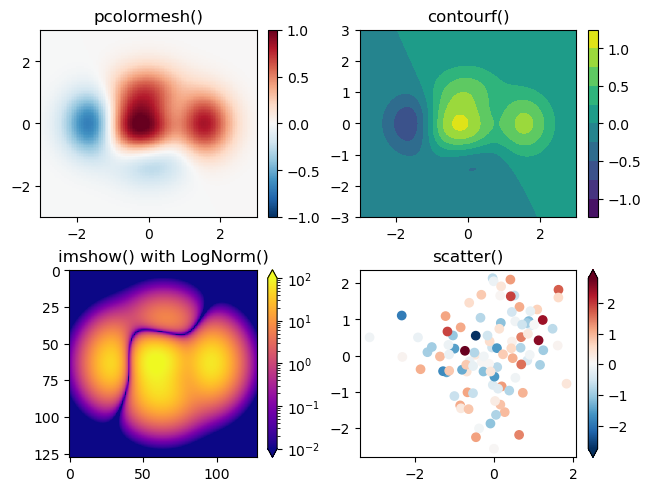

In [18]:
from typing import ChainMap


X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X / 2 + X**5 + Y**3) * np.exp(-(X**2) - Y**2)

fig, axs = plt.subplots(2, 2)
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title("pcolormesh()")

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title("contourf()")
pc = axs[1, 0].imshow(
    Z**2 * 100, cmap="plasma", norm=mpl.colors.LogNorm(vmin=0.01, vmax=100)
)
fig.colorbar(pc, ax=axs[1, 0], extend="both")
axs[1, 0].set_title("imshow() with LogNorm()")

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[1, 1], extend="both")
axs[1, 1].set_title("scatter()")